# The flying-related carbon impact of academic conferences

This markdown shows the codes for the tables and figures figures included in Ormosi (2019) The flying-related carbon impact of academic conferences, Sustainability, Forthcoming

## Loading packages

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import re

from time import sleep, time
from random import randint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [71]:
os.environ["PROJ_LIB"]="..." # path to basemap

os.chdir("...") # working dir

df=pd.read_pickle('...') # data shared on UK Data Service

In [7]:
df['distance']=(df['distance']*1.6)/1000

## Some basic descriptive stats

In [8]:
print('Number of presentations:',len(df))
total_miles=round(sum(df['distance']))
print('Total distance travelled:','{:,}'.format(total_miles),'km')
print('That\'s','{:,}'.format(round(total_miles/1.6)),'miles.')

Number of presentations: 55008
Total distance travelled: 413,599 km
That's 258,499 miles.


## Table 1

In [16]:
mileage=df.groupby(['speaker_region','venue_region']).agg({'distance':'sum'},axis=0).unstack()
mileage.columns=['venue_US','venue_EU','venue_other']
mileage.rename(index={0:'speaker_US',1:'speaker_EU',2:'speaker_other'}, inplace=True)
mileage.loc['Total',:]= round(mileage.sum(axis=0))
mileage.loc[:,'Total']= round(mileage.sum(axis=1))
mileage=np.round(mileage/1000,2)
mileage

,venue_US,venue_EU,venue_other,Total
speaker_region,,,,
speaker_US,37.22,89.93,54.16,181.30
speaker_EU,50.97,21.66,26.63,99.27
speaker_other,45.77,54.84,32.42,133.03
Total,133.96,166.43,113.21,413.60


## Table 2

In [55]:
total_em = df.groupby('venue_region').agg({'co2_med2':'sum','co2_opt2':'sum','co2_pes2':'sum'}).T
total_em.loc[:,'Total']= round(total_em.sum(axis=1))
total_em=total_em[['Total',0,1,2]]
total_em.rename(columns={'Total':'All venues',0:'US venues',1:'EU venues',2:'Other venues'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
total_em=round(total_em,2)
total_em

venue_region,All venues,US venues,EU venues,Other venues
Average,49407.0,16228.69,19275.72,13902.19
Optimistic,34390.0,11296.07,13416.97,9676.70
Pessimistic,78867.0,25905.66,30769.59,22191.90


In [51]:
# Per conference CO2

total_em2=df.groupby(['link']).agg({'co2_med2':'sum','co2_opt2':'sum','co2_pes2':'sum','venue_region':'mean'})
total_em2_2=total_em2.groupby('venue_region').agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).T
total_em2_3=pd.DataFrame(total_em2.agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).unstack())
total_em_conf=pd.concat([total_em2_3,total_em2_2],axis=1)
total_em_conf.rename(columns={'Total':'All venues',0:'US venues',1:'EU venues',2:'Other venues'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
total_em_conf=round(total_em_conf,2)
total_em_conf

US venues  US venues  EU venues  Other venues
Average     mean     187.86     163.93     180.15        243.90
            std      196.53     165.16     209.11        214.18
Optimistic  mean     130.76     114.10     125.39        169.77
            std      136.80     114.96     145.55        149.08
Pessimistic mean     299.88     261.67     287.57        389.33
            std      313.72     263.64     333.80        341.90

In [54]:
presentation_em=df.groupby('venue_region').agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).T
presentation_em2=pd.DataFrame(df.agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).unstack())
presentation_em=pd.concat([presentation_em2,presentation_em],axis=1)
presentation_em.rename(columns={'Total':'All venues',0:'US venues',1:'EU venues',2:'Other venues'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
presentation_em=round(presentation_em,2)
presentation_em

US venues  US venues  EU venues  Other venues
Average     mean       0.90       0.75       0.78          1.60
            std        0.98       0.83       0.86          1.29
Optimistic  mean       0.63       0.52       0.54          1.11
            std        0.68       0.58       0.60          0.90
Pessimistic mean       1.43       1.20       1.24          2.55
            std        1.56       1.32       1.37          2.06

## Table 3

In [61]:
total_em_sp=df.groupby('region').agg({'co2_med2':['sum'],'co2_opt2':['sum'],'co2_pes2':['sum']}).T
total_em_sp.rename(columns={'Total':'All venues',0:'US speaker',1:'EU speaker',2:'Other speaker'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
total_em_sp=round(total_em_sp,2)
total_em_sp

,region,US speaker,EU speaker,Other speaker
Average,sum,21764.95,11723.38,15918.28
Optimistic,sum,15149.62,8160.12,11080.01
Pessimistic,sum,34743.12,18713.88,25410.15


In [63]:
total_em_sp2=df.groupby('region').agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).T
total_em_sp2.rename(columns={'Total':'All venues',0:'US speaker',1:'EU speaker',2:'Other speaker'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
total_em_sp2=round(total_em_sp2,2)
total_em_sp2

region            US speaker  EU speaker  Other speaker
Average     mean        0.95        0.58           1.34
            std         0.92        0.81           1.15
Optimistic  mean        0.66        0.40           0.93
            std         0.64        0.57           0.80
Pessimistic mean        1.51        0.93           2.14
            std         1.46        1.30           1.83

## Table 4

In [64]:

df_short=df[(df['text']==True)].copy()  # limiting sample to where citations is available
df_inv=df[(df['text']==False)].copy()  # limiting sample to where citations is not available

aggregate=df_short.groupby('fuzzy_speaker').agg({'distance':'mean','co2_med2':'mean','id':'count','year_y':'mean',
                          'presentations':'mean'})
aggregate.columns=['distance','co2','number_of_trips','year','conference_size']
aggregate=aggregate.dropna()


aggregate_inv=df_inv.groupby('fuzzy_speaker').agg({'distance':'mean','co2_med':'mean','id':'count','year_y':'mean','presentations':'mean'})
aggregate_inv.columns=['distance','co2','number_of_trips','year','conference_size']
aggregate_inv=aggregate_inv.dropna()
#aggregate_inv=aggregate_inv[aggregate_inv['speaker_other']==1]
#aggregate=aggregate[aggregate['speaker_other']==1]
import scipy.stats as stats
import statistics

sample=[]
sample_inv=[]
for column in aggregate:
    mean=round(statistics.mean(aggregate[column]),3)
    sd=round(statistics.stdev(aggregate[column]),3)
    test=stats.ttest_ind(a= aggregate[column], b= aggregate_inv[column],equal_var=False)
    tstat=round(test[0],3)
    pval=round(test[1],3)
    sample.append(mean)
    sample.append(sd)


for column in aggregate_inv:
    mean=round(statistics.mean(aggregate_inv[column]),3)
    sd=round(statistics.stdev(aggregate_inv[column]),3)
    test=stats.ttest_ind(a= aggregate_inv[column], b= aggregate[column],equal_var=False)
    tstat=round(test[0],3)
    pval=round(test[1],3)
    sample_inv.append(mean)
    sample_inv.append(sd)


descriptive=pd.concat([pd.DataFrame(sample), pd.DataFrame(sample_inv)],axis=1)
descriptive=descriptive.rename(index={0: "distance", 1: "std", 2: "co2_average",3: "std", 4: "number of trips",
                                      5: "std",6: "year",7:'std',8:'conference_size',9:'std'})
descriptive

,0,0
distance,7.537,7.423
std,7.340,7.480
co2_average,0.917,0.891
std,0.926,0.913
number of trips,1.663,1.728
std,1.270,1.336
year,2011.814,2013.504
std,4.405,4.036
conference_size,348.903,401.211
std,220.612,331.200


## Table 5

In [66]:
citations=df_short.groupby(['speaker_region','venue_region']).agg({'citation':'mean'},axis=0).unstack()
citations.columns=['venue_US','venue_EU','venue_other']
citations.rename(index={0:'speaker_US',1:'speaker_EU',2:'speaker_other'}, inplace=True)
citations=round(citations,2)
citations

,venue_US,venue_EU,venue_other
speaker_region,,,
speaker_US,42.13,28.59,27.80
speaker_EU,23.96,12.94,17.23
speaker_other,20.70,12.94,14.01


## Table 6

In [67]:
df_short=df[(df['text']==True)].copy() # limiting sample to where citations is available

aggregate=df_short.groupby('fuzzy_speaker').agg({'citation':'sum','distance':'mean','co2_med2':'mean','id':'count','year_y':'mean',
                          'presentations':'mean','speaker_us':'mean', 'speaker_eu':'mean'})
aggregate.columns=['citations','distance','co2','number_of_trips','year','conference_size','speaker_us','speaker_eu']
aggregate=aggregate.dropna()

# standardising
from sklearn import preprocessing
aggregate_std=aggregate.copy()
aggregate_std['citations']=preprocessing.scale(aggregate_std['citations'])
aggregate_std['distance']=preprocessing.scale(aggregate_std['distance'])
aggregate_std['number_of_trips']=preprocessing.scale(aggregate_std['number_of_trips'])
aggregate_std['conference_size']=preprocessing.scale(aggregate_std['conference_size'])
aggregate_std['co2']=preprocessing.scale(aggregate_std['co2'])

# running ols

import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.iolib.summary2 import summary_col

model1 = sm.ols(formula = 'citations ~  distance +  number_of_trips + year +  conference_size +  speaker_us + speaker_eu  +(distance*speaker_us) +(distance*speaker_eu) + (number_of_trips * speaker_us) + (number_of_trips * speaker_eu) ', 
               data = aggregate).fit()
model2 = sm.ols(formula = 'citations ~  distance +  number_of_trips  +  conference_size +  speaker_us + speaker_eu  +(distance*speaker_us) +(distance*speaker_eu) + (number_of_trips * speaker_us) + (number_of_trips * speaker_eu) ', 
               data = aggregate).fit()
model3 = sm.ols(formula = 'citations ~  distance +  number_of_trips  +  conference_size +  speaker_us + speaker_eu  +(distance*speaker_us) +(distance*speaker_eu) + (number_of_trips * speaker_us) + (number_of_trips * speaker_eu) ', 
               data = aggregate_std).fit()
model3a = sm.ols(formula = 'citations ~  distance +  number_of_trips   ', data = aggregate).fit()

regoutput = summary_col([model1,model2,model3,model3a],stars=True)
print(regoutput)

C:\Users\peter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)



                            citations I  citations II citations III citations IIII
----------------------------------------------------------------------------------
Intercept                  12708.1751*** -2.9442      -0.1204***    -19.0612***   
                           (561.9985)    (6.0134)     (0.0226)      (2.3355)      
conference_size            0.0015        -0.0238***   -0.0400***                  
                           (0.0054)      (0.0054)     (0.0091)                    
distance                   -0.1632       -0.2874      -0.0160       -0.1760       
                           (0.2999)      (0.3074)     (0.0171)      (0.1657)      
distance:speaker_eu        -0.2473       1.0461**     0.0583**                    
                           (0.4302)      (0.4370)     (0.0244)                    
distance:speaker_us        -0.2259       -0.2359      -0.0132                     
                           (0.3993)      (0.4093)     (0.0228)                    
num

## Figure 1

Coefficients: 
 [-0.01602815  0.24270034 -0.03995416  0.24382628  0.00375688 -0.01315262
  0.05833372  0.19645476 -0.02829417]


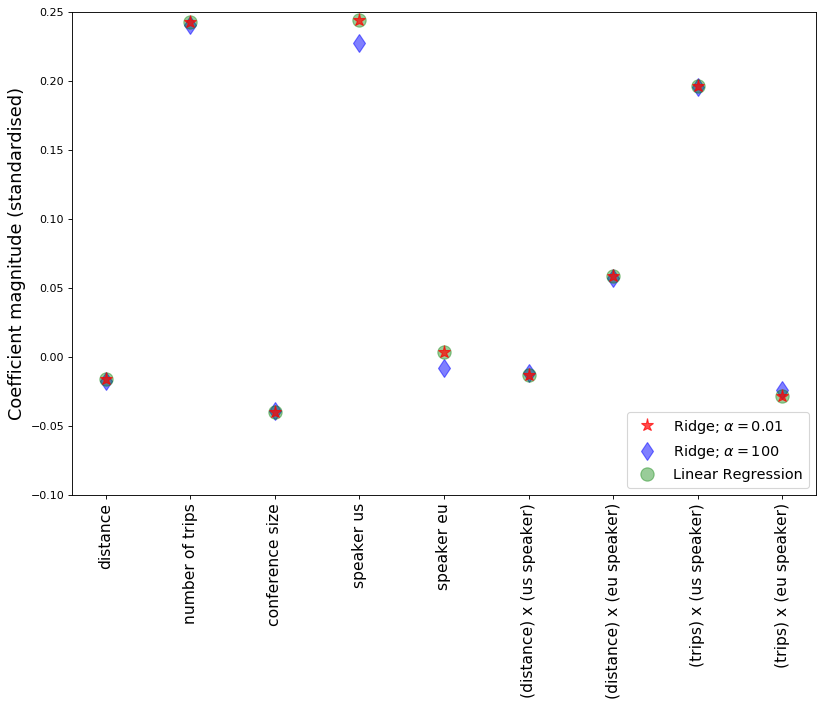

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()

df_rt=aggregate_std.copy() # ridge assumes that the predictors are standardised

df_rt['distance_us_speaker']=df_rt['distance']*df_rt['speaker_us']
df_rt['distance_eu_speaker']=df_rt['distance']*df_rt['speaker_eu']
df_rt['trips_us_speaker']=df_rt['number_of_trips']*df_rt['speaker_us']
df_rt['trips_eu_speaker']=df_rt['number_of_trips']*df_rt['speaker_eu']
df_rt['co2_us_speaker']=df_rt['co2']*df_rt['speaker_us']
df_rt['co2_eu_speaker']=df_rt['co2']*df_rt['speaker_eu']

labels = np.array(df_rt['citations'])
df_rt = df_rt.drop('citations', axis = 1)
df_rt = df_rt.drop(['co2','co2_us_speaker','co2_eu_speaker','year'], axis = 1)

# Saving feature names for figure
feature_names = list(df_rt.columns)
features=['distance', 'number of trips', 'conference size', 'speaker us', 'speaker eu', '(distance) x (us speaker)',
          '(distance) x (eu speaker)', '(trips) x (us speaker)', '(trips) x (eu speaker)']

lr.fit(df_rt, labels)
print('Coefficients: \n', lr.coef_)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
rr.fit(df_rt, labels)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(df_rt, labels)

# plotting
x = range(len(feature_names))
axes = figure(figsize=(12, 8), dpi=80).add_subplot(111)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=12,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=12,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=12,color='green',label='Linear Regression')
#plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient magnitude (standardised)',fontsize=16)
plt.ylim(-0.1, 0.25)
plt.legend(fontsize=13,loc=4)
plt.xticks(x,features, rotation='vertical',fontsize=14)
plt.show()



## Table A1

In [70]:
model4 = sm.ols(formula = 'citations ~  co2 +  number_of_trips + year +  conference_size +  speaker_us + speaker_eu  +(co2*speaker_us) +(co2*speaker_eu) + (number_of_trips * speaker_us) + (number_of_trips * speaker_eu) ', 
               data = aggregate).fit()
model5 = sm.ols(formula = 'citations ~  co2 +  number_of_trips  + conference_size +  speaker_us + speaker_eu  +(co2*speaker_us) +(co2*speaker_eu) + (number_of_trips * speaker_us) + (number_of_trips * speaker_eu) ', 
               data = aggregate).fit()
model6 = sm.ols(formula = 'citations ~  co2 +  number_of_trips  +  conference_size +  speaker_us + speaker_eu  +(co2*speaker_us) +(co2*speaker_eu) + (number_of_trips * speaker_us) + (number_of_trips * speaker_eu) ', 
               data = aggregate_std).fit()
model6a = sm.ols(formula = 'citations ~  distance +  number_of_trips   ', data = aggregate).fit()
model6b = sm.ols(formula = 'citations ~  distance +  number_of_trips   ', data = aggregate_std).fit()

regoutput = summary_col([model4,model5,model6,model6a],stars=True)
print(regoutput)


                            citations I  citations II citations III citations IIII
----------------------------------------------------------------------------------
Intercept                  12816.7221*** -4.2613      -0.1237***    -19.0612***   
                           (565.6990)    (5.9852)     (0.0226)      (2.3355)      
co2                        -2.2482       -1.3309      -0.0094                     
                           (2.4193)      (2.4798)     (0.0174)                    
co2:speaker_eu             -1.6493       8.3625**     0.0588**                    
                           (3.4032)      (3.4592)     (0.0243)                    
co2:speaker_us             -0.1407       0.1220       0.0009                      
                           (3.1991)      (3.2795)     (0.0231)                    
conference_size            0.0017        -0.0236***   -0.0395***                  
                           (0.0054)      (0.0054)     (0.0091)                    
dis

## Figure A1

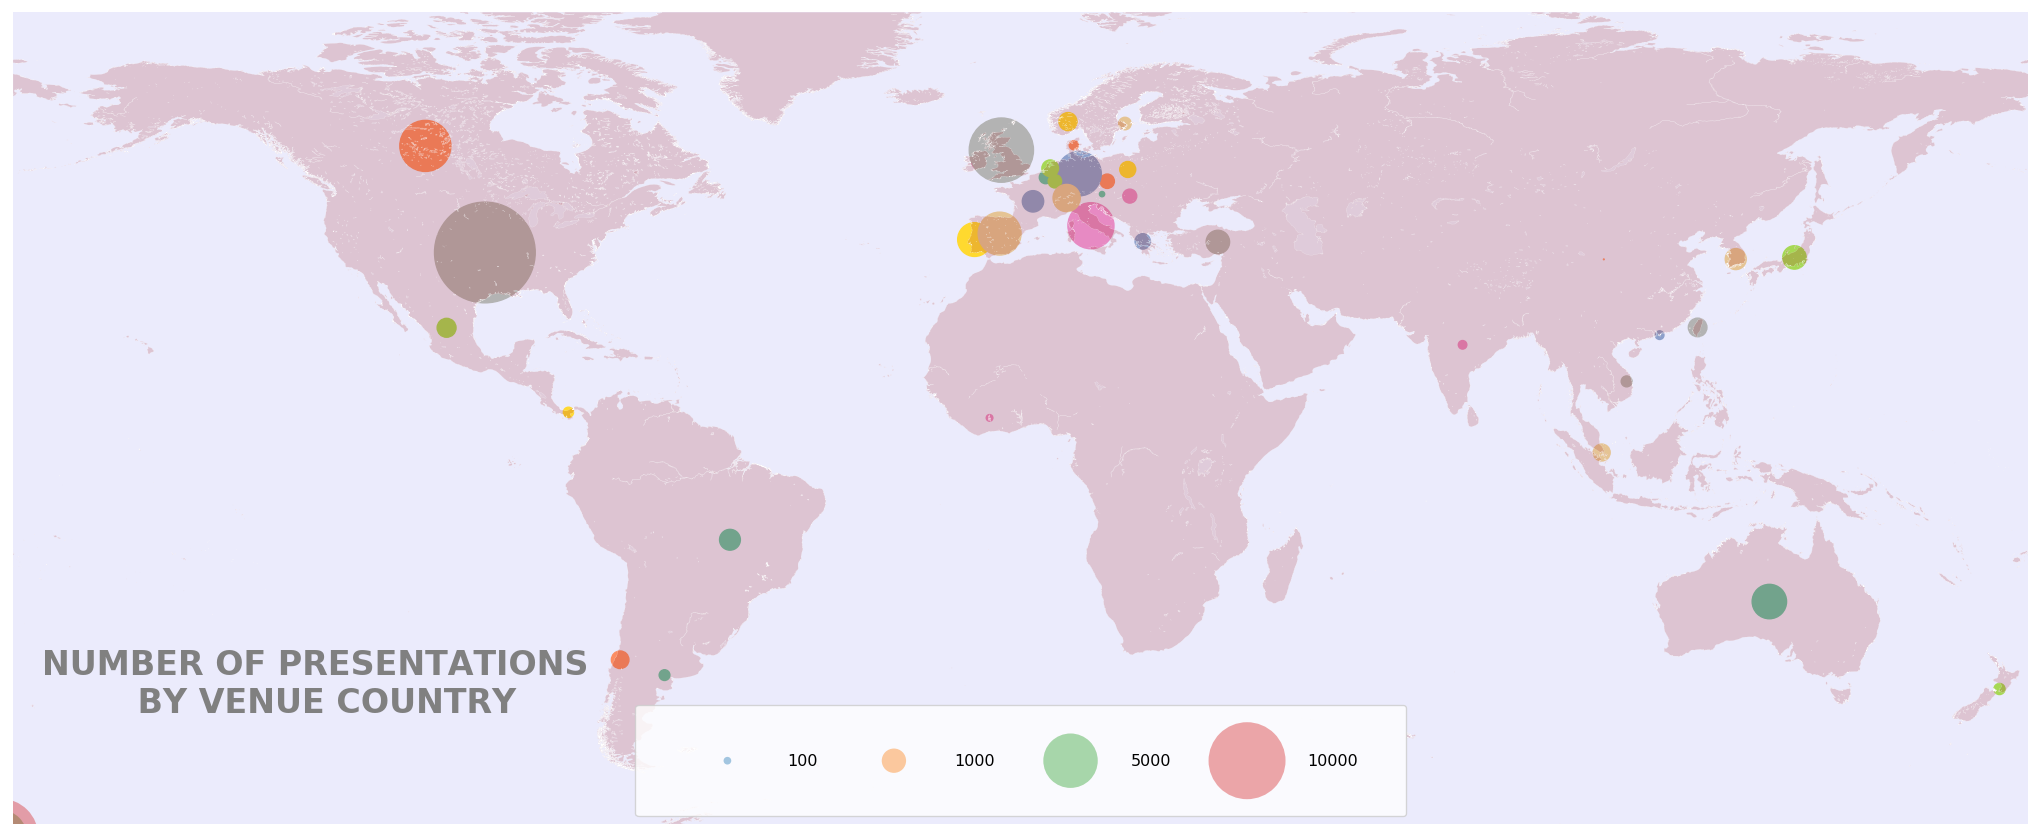

In [72]:
# data for bubble maps
venue_country=pd.read_pickle('venue_country') 
speaker_country=pd.read_pickle('speaker_country')

# BUBBLE MAPS

import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
 
# BUBBLE MAP - VENUE
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
data = venue_country.copy()
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80,resolution='h')
m.drawmapboundary(fill_color='#EBEBFC', linewidth=0)
m.fillcontinents(color='brown', alpha=0.2)
m.drawcoastlines(linewidth=0.1, color="white")
# prepare a color for each point depending on the country.
data['labels'] = pd.factorize(data['country'])[0]
# Add a point per position
m.scatter(data['longitude'], data['latitude'] , s=data['count']/3, c=data['labels'], cmap="Set2")
plt.text(-125,-40, 'NUMBER OF PRESENTATIONS \n BY VENUE COUNTRY',fontsize=25,fontweight='bold',
                    ha='center',va='center',color='grey')

l1 = plt.scatter([],[], s=100/3, edgecolors='none', alpha=0.4)
l2 = plt.scatter([],[], s=1000/3, edgecolors='none', alpha=0.4)
l3 = plt.scatter([],[], s=5000/3, edgecolors='none', alpha=0.4)
l4 = plt.scatter([],[], s=10000/3, edgecolors='none', alpha=0.4)

labels = ["100", "1000", "5000", "10000"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=12,
handlelength=5.5, loc = 8, borderpad = 3, handletextpad=1, scatterpoints = 1)
plt.show()
#plt.savefig('Bubble_map1.png', bbox_inches='tight')



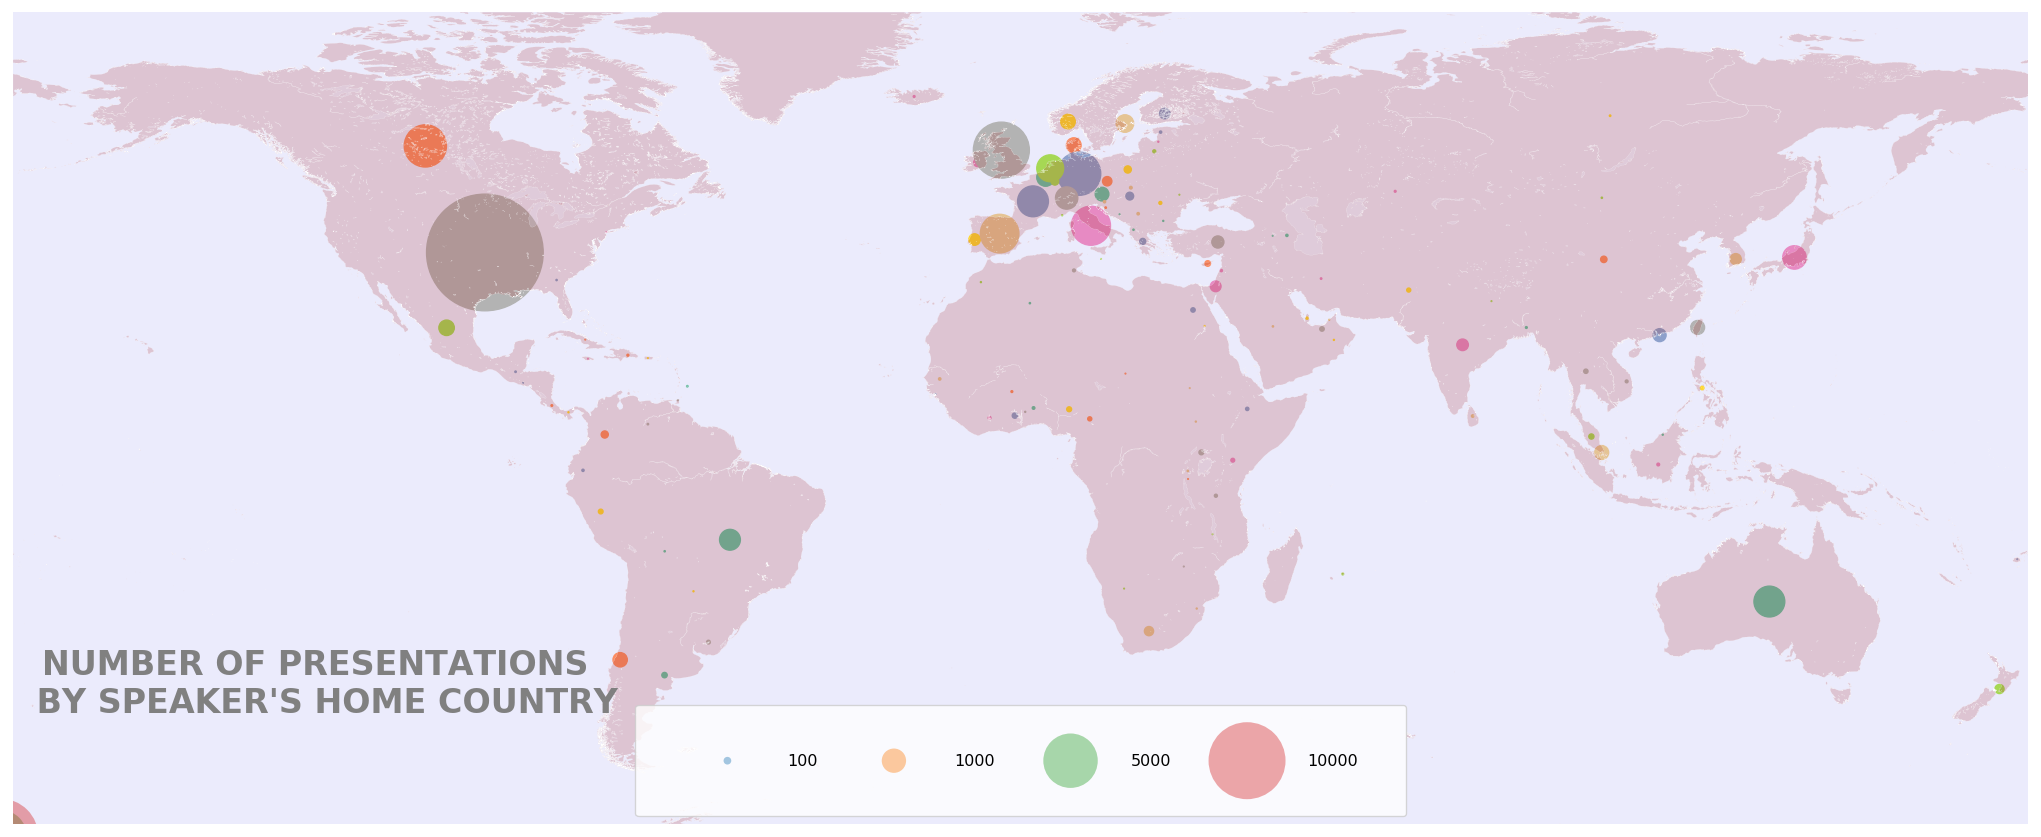

In [73]:
# BUBBLE MAP - VENUE
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
data = speaker_country.copy()
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80,resolution='h')
m.drawmapboundary(fill_color='#EBEBFC', linewidth=0)
m.fillcontinents(color='brown', alpha=0.2)
m.drawcoastlines(linewidth=0.1, color="white")
# prepare a color for each point depending on the country.
data['labels'] = pd.factorize(data['country'])[0]
# Add a point per position
m.scatter(data['longitude'], data['latitude'] , s=data['count']/3, c=data['labels'], cmap="Set2")
plt.text(-125,-40, 'NUMBER OF PRESENTATIONS \n BY SPEAKER\'S HOME COUNTRY',fontsize=25,fontweight='bold',
                    ha='center',va='center',color='grey')
l1 = plt.scatter([],[], s=100/3, edgecolors='none', alpha=0.4)
l2 = plt.scatter([],[], s=1000/3, edgecolors='none', alpha=0.4)
l3 = plt.scatter([],[], s=5000/3, edgecolors='none', alpha=0.4)
l4 = plt.scatter([],[], s=10000/3, edgecolors='none', alpha=0.4)

labels = ["100", "1000", "5000", "10000"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=12,
handlelength=5.5, loc = 8, borderpad = 3, handletextpad=1, scatterpoints = 1)
plt.show()
#plt.savefig('Bubble_map2.png', bbox_inches='tight')

## Figure A2

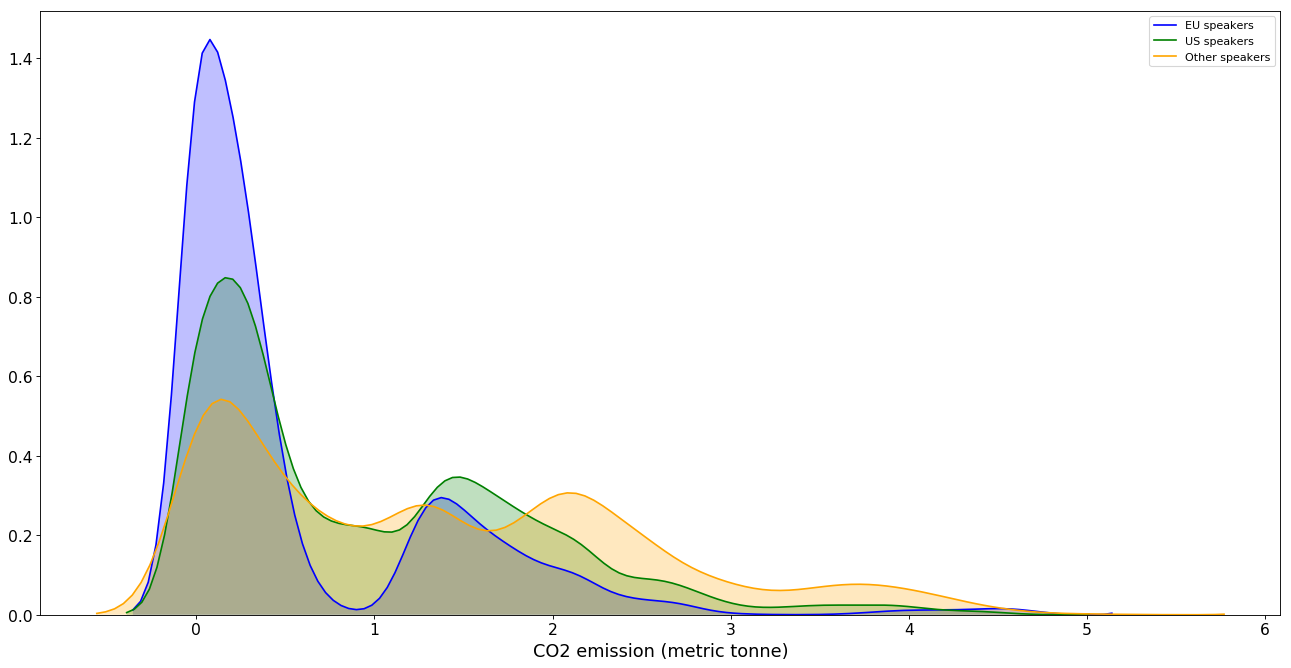

In [74]:
figure(figsize=(20, 10), dpi=80)
sns.kdeplot(df['co2_med2'][(df['speaker_eu']==1)], color="blue", shade=True,label='EU speakers')
sns.kdeplot(df['co2_med2'][(df['speaker_us']==1)], color="green", shade=True,label='US speakers')
sns.kdeplot(df['co2_med2'][(df['speaker_other']==1)], color="orange", shade=True,label='Other speakers')
plt.xlabel('CO2 emission (metric tonne)',fontsize=16)
plt.tick_params(labelsize=14)
plt.rc('legend', fontsize=16)
plt.show()
#plt.savefig('emission_density.png', bbox_inches='tight')

## Figure A3

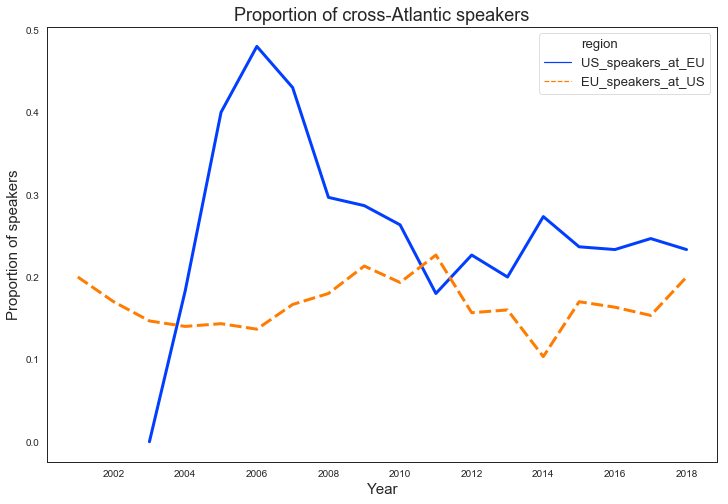

In [77]:
# number of presentations per year per region

pres=df.groupby(['link']).agg({'year_y':'mean','id':'count','venue_region':'min'}) # venue region 0:US, 1:EU, 2:Other
presentations=pres.groupby(['year_y','venue_region']).agg({'id':'sum'}).unstack()
presentations.columns=(['n_speakers_at_US','n_speakers_at_EU','n_speakers_at_other'])
presentations=presentations.fillna(0)

# milage per year per region
mileage=[]
mileage=df.groupby(['year_y','speaker_region']).agg({'distance':'mean','id':'count'},axis=0) # speaker region 0:US, 1:EU, 2:Other
mileage['distance']=round(mileage['distance']/1)
mileage=mileage.unstack()
mileage.columns=['US_speakers','EU_speakers','Other_speakers','US_speakers_n','EU_speakers_n','Other_speakers_n']

# number of cross atlantic trips (EU-US) per year per region

cross_atl=df.groupby(['year_y','speaker_region']).agg({'cross_atl':'sum'}).unstack()
cross_atl=cross_atl.drop(cross_atl.columns[[2]],axis=1)
cross_atl.columns=['US_speakers_at_EU','EU_speakers_at_US']
mileage=pd.concat([mileage,cross_atl,presentations],axis=1,ignore_index=False)
mileage['US_speakers_at_EU']=round(mileage['US_speakers_at_EU']/mileage['n_speakers_at_EU'],2)
mileage['EU_speakers_at_US']=round(mileage['EU_speakers_at_US']/mileage['n_speakers_at_US'],2)
mileage=mileage[mileage.columns[[3,0,6,4,1,7,5,2]]]
mileage=mileage.fillna(0)

# prepare plot for cross-atlantic

mileage=round(mileage,2)
mileage['year']=mileage.index
mileage_long=pd.melt(mileage.iloc[:,[2,5,8]],id_vars=['year'],var_name='region', value_name='values')
mileage_long['values_m']=mileage_long['values'].rolling(window=3).mean()

fig, ax = plt.subplots(figsize=(12, 8))    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
sns.set(style="white")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("bright",6)
g=sns.lineplot(x="year", y="values_m",style="region", hue='region',   data=mileage_long, lw=3)
g.axes.set_title("Proportion of cross-Atlantic speakers",fontsize=18)
g.set_xlabel("Year",fontsize=15)
g.set_ylabel("Proportion of speakers",fontsize=15)
g.tick_params(labelsize=10)
plt.show()
#plt.savefig('trans_atlantic.png', bbox_inches='tight')


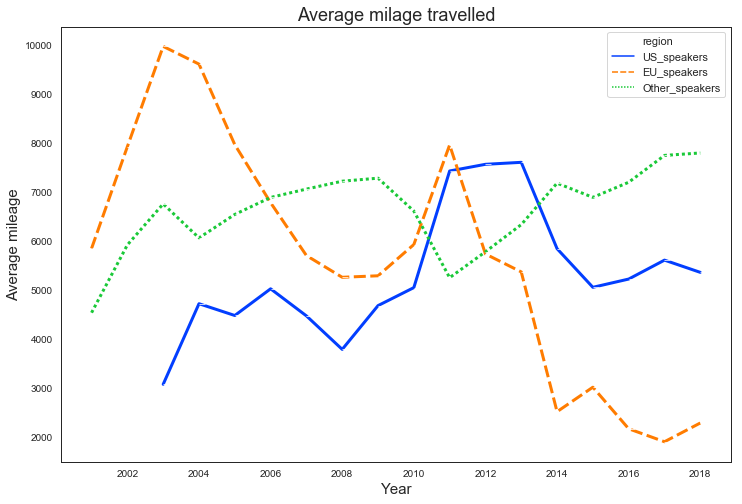

In [78]:
mileage_long2=pd.melt(mileage.iloc[:,[1,4,7,8]],id_vars=['year'],var_name='region', value_name='values')
mileage_long2['values_m']=mileage_long2['values'].rolling(window=3).mean()

fig, ax = plt.subplots(figsize=(12, 8))    
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#g.set(xlabel='year', ylabel='tonnes of CO2 emission per speaker/trip')
sns.set(style="white")
#sns.set_context("paper", font_scale=1.5)
sns.set_palette("bright",6)
g=sns.lineplot(x="year", y="values_m", style="region", hue='region', data=mileage_long2, lw=3, marker=True)
g.axes.set_title("Average milage travelled",fontsize=18)
g.set_xlabel("Year",fontsize=15)
g.set_ylabel("Average mileage",fontsize=15)
g.tick_params(labelsize=10)
plt.show()

## regression tree - feature relevance

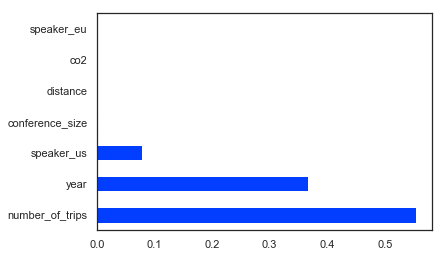

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_rt=aggregate.copy()
labels = np.array(df_rt['citations'])
df_rt = df_rt.drop('citations', axis = 1)
df_rt=df_rt.iloc[:,:7]
# Saving feature names for later use
feature_list = list(df_rt.columns)
# Convert to numpy array
df_rt = np.array(df_rt)


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1, random_state = 42, max_depth=4,min_samples_leaf=10 )
# Train the model on training data
rf.fit(df_rt, labels);

importance=rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=feature_list)
feat_importances.nlargest(7).plot(kind='barh')